In [1]:
import cv2

In [34]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class values:
    final_b=0
    final_m1=0
    final_m2=0

In [20]:
def error(b,m1,m2,points):
    totalError=0
    for i in range(0,len(points)):
        x1=points[i,0]
        x2=points[i,1]
        y=points[i,2]
        totalError+=(y-(m1*x1+m2*x2+b))**2
    return totalError/float(len(points))

In [4]:
def step_gradient(b_current,m1_current,m2_current,points,learningRate):
    #gradient descent
    b_gradient=0
    m1_gradient=0
    m2_gradient=0
    N=float(len(points))
    for i in range(0,len(points)):
        x1=points[i,0]
        x2=points[i,1]
        y=points[i,2]
        b_gradient+=-(2/N)*(y-(m1_current*x1+m2_current*x2+b_current))
        m1_gradient+=-(2/N)*x1*(y-(m1_current*x1+m2_current*x2+b_current))
        m2_gradient+=-(2/N)*x2*(y-(m1_current*x1+m2_current*x2+b_current))
    new_b=b_current-(learningRate*b_gradient)
    new_m1=m1_current-(learningRate*m1_gradient)
    new_m2=m2_current-(learningRate*m2_gradient)
    return [new_b,new_m1,new_m2]

In [16]:
def gradient_descent_runner(points,starting_b,starting_m1,starting_m2,learning_rate,num_iterations):
    b=starting_b
    m1=starting_m1
    m2=starting_m2
    for i in range(num_iterations):
        print("At iteration",i,"Error is:",error(b,m1,m2,points))
        [b,m1,m2]=step_gradient(b,m1,m2,array(points),learning_rate)
    return [b,m1,m2]

In [37]:
def multi():
    points=genfromtxt('data_m.csv',delimiter=",")
    learning_rate=0.00001
    initial_b=0
    initial_m1=0
    initial_m2=0
    num_iterations=1000
    [values.final_b,values.final_m1,values.final_m2]=gradient_descent_runner(points,initial_b,initial_m1,initial_m2,learning_rate,num_iterations)
   

In [38]:
multi()


At iteration 0 Error is: 1911017.90625
At iteration 1 Error is: 647165.870317
At iteration 2 Error is: 251314.332887
At iteration 3 Error is: 127325.008813
At iteration 4 Error is: 88484.3288332
At iteration 5 Error is: 76312.6451609
At iteration 6 Error is: 72493.8320908
At iteration 7 Error is: 71291.1850827
At iteration 8 Error is: 70907.9388412
At iteration 9 Error is: 70781.3372552
At iteration 10 Error is: 70735.1222211
At iteration 11 Error is: 70714.0887938
At iteration 12 Error is: 70700.9464989
At iteration 13 Error is: 70690.2798685
At iteration 14 Error is: 70680.3927475
At iteration 15 Error is: 70670.753889
At iteration 16 Error is: 70661.196901
At iteration 17 Error is: 70651.6696663
At iteration 18 Error is: 70642.1558587
At iteration 19 Error is: 70632.6503623
At iteration 20 Error is: 70623.1515721
At iteration 21 Error is: 70613.6589829
At iteration 22 Error is: 70604.1724339
At iteration 23 Error is: 70594.691872
At iteration 24 Error is: 70585.2172782
At iteration 

At iteration 682 Error is: 65481.2953824
At iteration 683 Error is: 65475.0343601
At iteration 684 Error is: 65468.77727
At iteration 685 Error is: 65462.5241098
At iteration 686 Error is: 65456.274877
At iteration 687 Error is: 65450.0295691
At iteration 688 Error is: 65443.7881836
At iteration 689 Error is: 65437.550718
At iteration 690 Error is: 65431.31717
At iteration 691 Error is: 65425.087537
At iteration 692 Error is: 65418.8618165
At iteration 693 Error is: 65412.6400061
At iteration 694 Error is: 65406.4221033
At iteration 695 Error is: 65400.2081057
At iteration 696 Error is: 65393.9980108
At iteration 697 Error is: 65387.7918161
At iteration 698 Error is: 65381.5895192
At iteration 699 Error is: 65375.3911176
At iteration 700 Error is: 65369.1966089
At iteration 701 Error is: 65363.0059906
At iteration 702 Error is: 65356.8192603
At iteration 703 Error is: 65350.6364155
At iteration 704 Error is: 65344.4574538
At iteration 705 Error is: 65338.2823727
At iteration 706 Error 

In [39]:
print("Final b is",values.final_b)
print("final m1 is ",values.finl=al_m1)
print("final m2 is",values.final_m2)


Final b is -0.133142252855
final m1 is  8.58680104499
final m2 is 8.97989318115


In [40]:
dist_pred=[]
dist_true=[]
start_val=[]
people_val=[]
points = genfromtxt('data_m.csv',delimiter=",")
for i in range(1,len(points)):
    start=points[i,0]
    people=points[i,1]
    dist=points[i,2]
    start_val.append(points[i,0])
    people_val.append(points[i,1])
    dist_pred.append(values.final_b+values.final_m1*start+values.final_m2*people)
    dist_true.append(points[i,2])

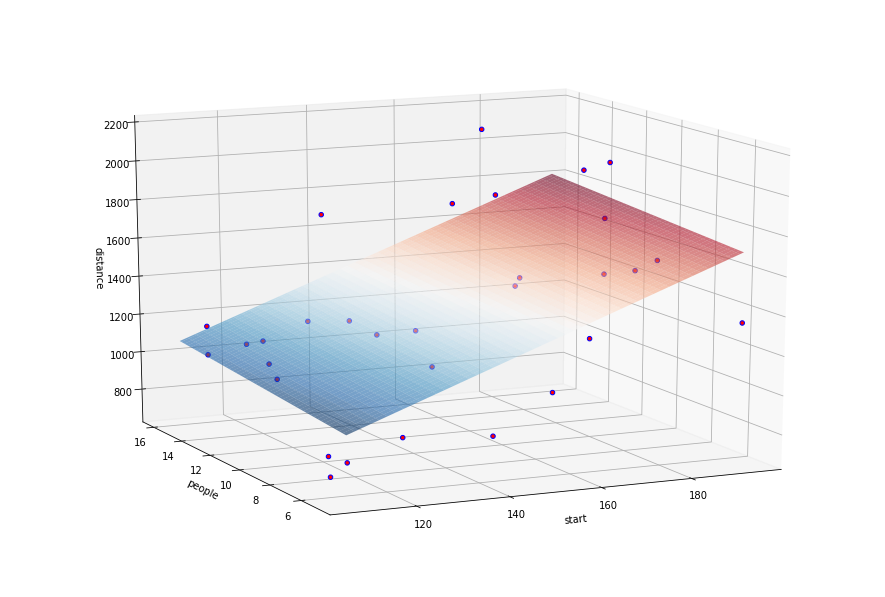

In [45]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
xx1, xx2 = np.meshgrid(np.linspace(min(start_val),max(start_val), 100), np.linspace(min(people_val), max(people_val), 100))
Z = values.final_b+ values.final_m1*xx1+values.final_m2*xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)
ax.set_xlabel('start')
ax.set_ylabel('people')
ax.set_zlabel('distance')

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)
ax.scatter(start_val,people_val,dist_true, color='blue', alpha=1.0, facecolor='red')

plt.show()